<left><img width=25% src="img/cornell_tech2.svg"></left>

# Lecture 18: Clustering

### Applied Machine Learning

__Volodymyr Kuleshov__<br>Cornell Tech

# Part 1: Gaussian Mixture Models

Clustering is a common unsupervised learning problem with numerous applications.

We will start by defining the problem and outlining some models for this problem.

# Review: Unsupervised Learning

We have a dataset *without* labels. Our goal is to learn something interesting about the structure of the data:
* Clusters hidden in the dataset.
* Outliers: particularly unusual and/or interesting datapoints.
* Useful signal hidden in noise, e.g. human speech over a noisy phone.

# Review: Unsupervised Learning

We will assume that the dataset is sampled from a probability distribution $P_\text{data}$, which we will call the *data distribution*. We will denote this as
$$x \sim P_\text{data}.$$

The dataset $\mathcal{D} = \{x^{(i)} \mid i = 1,2,...,n\}$ consists of *independent and identicaly distributed* (IID) samples from $P_\text{data}$.

# Clustering

Clustering is the problem of identifying distinct components in the data distribution.
* A cluster $C_k \subseteq \mathcal{X}$ is associated with a subset of the $x$ coming from $P_\text{data}$.
* Datapoints in a cluster are more similar to each other than to other clusters
* Clusters are usually defined by their centers, and potentially by other shape parameters.

# Review: $K$-Means

$K$-Means is the simplest example of a clustering algorithm.
* The algorithm seeks to find $K$ hidden clusters in the data.
* Each cluster is characterized by its centroid (its mean).
* The clusters reveal interesting structure in the data.    

We seek centroids $c_k$ such that the distance between the points and their closest centroid is minimized:
$$J(\theta) = \sum_{i=1}^n || x^{(i)} - \text{centroid}(f_\theta(x^{(i)})) ||,$$
where $\text{centroid}(k) = c_k$ denotes the centroid for cluster $k$.

This is best illustrated visually (from [Wikipedia](https://commons.wikimedia.org/wiki/File:K-means_convergence.gif)):

<center><img width=50% src="img/kmeans_convergence.gif"></center>

$K$-Means has a number of limitations:
* Clustering can get stuck in local minima
* Measuring clustering quality is hard and relies on heuristics
* Cluster assignment is binary and doesn't estimate confidence

# Gaussian Mixture Models

Gaussian mixtures are latent-variable probabilistic models that are useful for clustering. They define a model
$$P_\theta (x,z) = P_\theta (x | z) P_\theta (z)$$
* $z \in \{1,2,\ldots,K\}$ is discrete and follows a categorical distribution $P_\theta(z=k) = \phi_k$.
* $x \in \mathbb{R}$ is continuous; conditioned on $z=k$, it follows a Normal distribution $P_\theta(x | z=k) = \mathcal{N}(\mu_k, \Sigma_k)$.

The parameters $\theta$ are the $\mu_k, \Sigma_k, \phi_k$ for all $k=1,2,\ldots,K$.

# Gaussian Mixtures for Clustering

Gaussian mixtures define a model
$$P_\theta (x,z) = P_\theta (x | z) P_\theta (z)$$
* This model postulates that our observed data is comprised of  $K$ clusters with proportions specified by $\phi_1,\phi_2, \ldots, \phi_K$
* The points within each cluster follow a Normal distribution
* To generate a new data point, we sample a cluster $z=k$ from $P_\theta(z)$ and then $x$ sample from its Gaussian $P_\theta(x|z=k)$

This is best understood via a picture.
<center><img width=50% src="img/mogdensity_v3.png"></center>

Mixtures of Gaussians fit more complex distributions than one Gaussian.

Raw data | Single Gaussian | Mixture of Gaussians
--|--|---
<img width=90% src="img/oldfaithful_v2.png"> | <img width=90% src="img/oldfSingle_v2.png"> | <img width=90% src="img/oldfMOG_v2.png">

# Recovering Clusters from GMMs

Given a trained model $P_\theta (x,z) = P_\theta (x | z) P_\theta (z)$, we can look at the *posterior* probability
$$P_\theta(z = k\mid x) = \frac{P_\theta(z=k, x)}{P_\theta(x)} = \frac{P_\theta(x | z=k) P_\theta(z=k)}{\sum_{l=1}^K P_\theta(x | z=l) P_\theta(z=l)}$$
of a point $x$ belonging to class $k$.

* The posterior distribution defines a "soft" assignment of $x$ to each class.
* This is in contrast to the hard assignments form $K$-Means.

# Learning GMMs

Gaussian mixtures are latent variable models, and we can learn them using maximum marginal log-likelihood:
$$
\max_\theta \sum_{x\in \mathcal{D}} \log P_\theta(x) = \max_\theta \sum_{x\in \mathcal{D}} \log \left( \sum_{z \in \mathcal{Z}}P_\theta(x, z) \right)
$$

* Unlike in GMMs for supervised learning, cluster assignments are latent.
* Hence, there is no closed form solution for $\theta$. 
* We will soon see specialized algorithms for this task.

Optimizing the likelihood of latent variable models is hard. 

A Gaussian has a single maximum, but a mixture has many and its objective is non-convex (hard to optimize).

<center><img width=50% src="img/mogdensity1d_v2.png"></center>

# Beyond Gaussian Mixtures

We will focus on Gaussian mixture models in this lecture, but there exist many other kinds of clustering:
* Hierarchical clusters
* Points belonging to multiple clusters (e.g. topics)
* Clusters in graphs


See the `scikit-learn` [guide](https://scikit-learn.org/stable/modules/clustering.html) for more!

<left><img width=25% src="img/cornell_tech2.svg"></left>
# Part 2: Expectation Maximization

We will now describe expecation maximization (EM), an algorithm that can be used to fit Gaussian mixture models.

# Review: Unsupervised Learning

We will assume that the dataset is sampled from a probability distribution $P_\text{data}$, which we will call the *data distribution*. We will denote this as
$$x \sim P_\text{data}.$$

The dataset $\mathcal{D} = \{x^{(i)} \mid i = 1,2,...,n\}$ consists of *independent and identicaly distributed* (IID) samples from $P_\text{data}$.

# Review: Gaussian Mixture Models

Gaussian mixtures are latent-variable probabilistic models that are useful for clustering. They define a model
$$P_\theta (x,z) = P_\theta (x | z) P_\theta (z)$$
* $z \in \{1,2,\ldots,K\}$ is discrete and follows a categorical distribution $P_\theta(z=k) = \phi_k$.
* $x \in \mathbb{R}$ is continuous; conditioned on $z=k$, it follows a Normal distribution $P_\theta(x | z=k) = \mathcal{N}(\mu_k, \Sigma_k)$.

The parameters $\theta$ are the $\mu_k, \Sigma_k, \phi_k$ for all $k=1,2,\ldots,K$.

# Review: Learning GMMs

Gaussian mixtures are latent variable models, and we can learn them using maximum marginal log-likelihood:
$$
\max_\theta \sum_{x\in \mathcal{D}} \log P_\theta(x) = \max_\theta \sum_{x\in \mathcal{D}} \log \left( \sum_{z \in \mathcal{Z}}P_\theta(x, z) \right)
$$

* Unlike in GMMs for supervised learning, cluster assignments are latent.
* Hence, there is not a closed form solution for $\theta$. 
* We will see specialized algorithm for this task.

# Expectation Maximization: Intuition

Expecation maximization (EM) is an algorithm for maximizing marginal log-likelihood 
$$\max_\theta \sum_{x^{(i)}\in \mathcal{D}} \log \left( \sum_{z \in \mathcal{Z}}P_\theta(x^{(i)}, z) \right)$$
that can also be used to learn Gaussian mixtures.

We want to optimize the marginal log-likelihood
$$\max_\theta \sum_{x^{(i)}\in \mathcal{D}} \log \left( \sum_{z \in \mathcal{Z}}P_\theta(x^{(i)}, z) \right).$$
* If we know the true $z^{(i)}$ for each $x^{(i)}$, we maximize
$$\max_\theta \sum_{x^{(i)}, z^{(i)}\in \mathcal{D}} \log \left( P_\theta(x^{(i)}, z^{(i)}) \right).$$
and it's easy to find the best $\theta$ (use solution for supervised learning).
* If we know $\theta$, we can estimate the cluster assignments $z^{(i)}$ for each $i$ by computing $P_\theta(z | x^{(i)})$.

Expectation maximization alternates between these two steps.

1. (__E-Step__) Given an estimate $\theta_t$ of the weights, compute $P_\theta(z | x^{(i)})$.
and use it to “hallucinate” expected cluster assignments $z^{(i)}$.
2. (__M-Step__) Find a new $\theta_{t+1}$ that maximizes the marginal log-likelihood by optimizing $P_\theta(x^{(i)}, z^{(i)})$ given the $z^{(i)}$ from step 1.

This process increases the marginal likelihood at each step and eventually converges.

# Expectation Maximization: Definition

Formally, EM learns the parameters $\theta$ of a latent-variable model $P_\theta(x,z)$ over a dataset $\mathcal{D} = \{x^{(i)} \mid i = 1,2,...,n\}$ as follows.

For $t=0,1,2,\ldots$, repeat until convergence:
1. (__E-Step__) For each $x^{(i)} \in \mathcal{D}$ compute $P_{\theta_t}(z|x^{(i)})$
2. (__M-Step__) Compute new weights $\theta_{t+1}$ as
\begin{align*}
\theta_{t+1} & = \arg\max_{\theta} \sum_{i=1}^n \mathbb{E}_{z^{(i)} \sim P_{\theta_t}(z|x^{(i)})} \log P_{\theta}(x^{(i)}, z^{(i)})
\end{align*}

Since assignments $P_{\theta_t}(z|x^{(i)})$ are "soft", M-step involves an expectation.

# Expectation Maximization: Definition

Formally, EM learns the parameters $\theta$ of a latent-variable model $P_\theta(x,z)$ over a dataset $\mathcal{D} = \{x^{(i)} \mid i = 1,2,...,n\}$ as follows.

For $t=0,1,2,\ldots$, repeat until convergence:
1. (__E-Step__) For each $x^{(i)} \in \mathcal{D}$ compute $P_{\theta_t}(z|x^{(i)})$
2. (__M-Step__) Compute new weights $\theta_{t+1}$ as
\begin{align*}
\theta_{t+1} & = \arg\max_{\theta} \sum_{i=1}^n \mathbb{E}_{z^{(i)} \sim P_{\theta_t}(z|x^{(i)})} \log P_{\theta}(x^{(i)}, z^{(i)}) \\
& = \arg\max_{\theta} \sum_{i=1}^n \sum_{k=1}^K P_{\theta_t}(z=k|x^{(i)}) \log P_{\theta}(x^{(i)}, z=k)
\end{align*}

# Understanding the E-Step

Intuitively, we hallucinate $z^{(i)}$ in the E-Step. 

In practice, the $P_{\theta_t}(z|x^{(i)})$ define "soft" assignments, and we compute a vector of class probabilities for each $x^{(i)}$.
<!-- * The $P_{\theta_t}(z|x^{(i)})$ define "soft" assignments, and we compute a vector of class probabilities for each $x^{(i)}$.
* We compute an expected values over $z^{(i)}$ instead of hallucinating one value. -->

# Understanding the M-Step

Since class assignments from E-step are probabilistic, we maximize an expectation:
\begin{align*}
\theta_{t+1} & = \arg\max_{\theta} \sum_{i=1}^n \mathbb{E}_{z^{(i)} \sim P_{\theta_t}(z|x^{(i)})} \log P_{\theta}(x^{(i)}, z^{(i)}) \\
& = \arg\max_{\theta} \sum_{i=1}^n \sum_{k=1}^K P_{\theta_t}(z=k|x^{(i)}) \log P_{\theta}(x^{(i)}, z=k)
\end{align*}
For many interesting models, this is tractable.

# Pros and Cons of EM

EM is a very important optimization algorithm in machine learning.
* It is easy to implement and is guaranteed to converge.
* It works in a lot of imporant ML models.

Its limitations include:
* It can get stuck in local optima.
* We may not be able to compute $P_{\theta_t}(z|x^{(i)})$ in every model.

<left><img width=25% src="img/cornell_tech2.svg"></left>
# Part 3: Expectation Maximization in Gaussian Mixture Models

Next, let's work through how Expectation Maximization works in Gaussian Mixture Models.

# Review: Gaussian Mixture Models

Gaussian mixtures are latent-variable probabilistic models that are useful for clustering. They define a model
$$P_\theta (x,z) = P_\theta (x | z) P_\theta (z)$$
* $z \in \{1,2,\ldots,K\}$ is discrete and follows a categorical distribution $P_\theta(z=k) = \phi_k$.
* $x \in \mathbb{R}$ is continuous; conditioned on $z=k$, it follows a Normal distribution $P_\theta(x | z=k) = \mathcal{N}(\mu_k, \Sigma_k)$.

The parameters $\theta$ are the $\mu_k, \Sigma_k, \phi_k$ for all $k=1,2,\ldots,K$.

# Review: Expectation Maximization

Formally, EM learns the parameters $\theta$ of a latent-variable model $P_\theta(x,z)$ over a dataset $\mathcal{D} = \{x^{(i)} \mid i = 1,2,...,n\}$ as follows.

For $t=0,1,2,\ldots$, repeat until convergence:
1. (__E-Step__) For each $x^{(i)} \in \mathcal{D}$ compute $P_{\theta_t}(z|x^{(i)})$
2. (__M-Step__) Compute new weights $\theta_{t+1}$ as
\begin{align*}
\theta_{t+1} & = \arg\max_{\theta} \sum_{i=1}^n \mathbb{E}_{z^{(i)} \sim P_{\theta_t}(z|x^{(i)})} \log P_{\theta}(x^{(i)}, z^{(i)})
\end{align*}

Since assignments $P_{\theta_t}(z|x^{(i)})$ are "soft", M-step involves an expectation.

# Deriving the E-Step

In the E-step, we compute the posterior for each data point $x$ as follows
 $$P_\theta(z = k\mid x) = \frac{P_\theta(z=k, x)}{P_\theta(x)} = \frac{P_\theta(x | z=k) P_\theta(z=k)}{\sum_{l=1}^K P_\theta(x | z=l) P_\theta(z=l)}$$
$P_\theta(z\mid x)$ defines a vector of probabilities that $x$ originates from component $k$ given the current set of parameters $\theta$

# Deriving the M-Step

At the M-step, we optimize the expected log-likelihood of our model.

\begin{align*}
&\max_\theta \sum_{x \in D} \mathbb{E}_{z \sim P_{\theta_t}(z|x)} \log P_\theta(x,z) = \\
& \max_\theta \left( \sum_{k=1}^K \sum_{x \in D} P_{\theta_t}(z_k|x) \log P_\theta(x|z_k) + \sum_{k=1}^K \sum_{x \in D} P_{\theta_t}(z_k|x) \log P_\theta(z_k) \right)
\end{align*}

As in supervised learning, we can optimize the two terms above separately.

We will start with $P_\theta(x\mid z=k) = \mathcal{N}(x; \mu_k, \Sigma_k)$. We have to find $\mu_k, \Sigma_k$ that optimize
$$
\max_\theta \sum_{x^{(i)} \in D} P(z=k|x^{(i)}) \log P_\theta(x^{(i)}|z=k)
$$
Note that this corresponds to fitting a Gaussian to a dataset whose elements $x^{(i)}$ each have a weight $P(z=k|x^{(i)})$.

Similarly to how we did this the supervised regime, we compute the derivative, set it to zero, and obtain closed form solutions:
\begin{align*}
\mu_k & = \frac{\sum_{i=1}^n P(z=k|x^{(i)}) x^{(i)}}{n_k} \\
\Sigma_k & = \frac{\sum_{i=1}^n P(z=k|x^{(i)}) (x^{(i)} - \mu_k)(x^{(i)} - \mu_k)^\top}{n_k} \\
n_k & = \sum_{i=1}^n P(z=k|x^{(i)}) \\
\end{align*}
Intuitively, the optimal mean and covariance are the emprical mean and convaraince of the dataset $\mathcal{D}$ when each element $x^{(i)}$ has a weight $P(z=k|x^{(i)})$.

Similarly, we can show that the class priors are
\begin{align*}
\phi_k & = \frac{n_k}{n} \\
n_k & = \sum_{i=1}^n P(z=k|x^{(i)})
\end{align*}

# EM in Gaussian Mixture Models

EM learns the parameters $\theta$ of a Gaussian mixture model $P_\theta(x,z)$ over a dataset $\mathcal{D} = \{x^{(i)} \mid i = 1,2,...,n\}$ as follows.

For $t=0,1,2,\ldots$, repeat until convergence:
1. (__E-Step__) For each $x^{(i)} \in \mathcal{D}$ compute $P_{\theta_t}(z|x^{(i)})$
2. (__M-Step__) Compute parameters $\mu_k, \Sigma_k, \phi_k$ using the above formulas

<left><img width=25% src="img/cornell_tech2.svg"></left>
# Part 4: Generalization in Probabilistic Models

Let's now revisit the concepts of overfitting and underfitting in GMMs.

# Review: Data Distribution

We will assume that the dataset is sampled from a probability distribution $\mathbb{P}$, which we will call the *data distribution*. We will denote this as
$$x \sim \mathbb{P}.$$

The dataset $\mathcal{D} = \{x^{(i)} \mid i = 1,2,...,n\}$ consists of *independent and identicaly distributed* (IID) samples from $\mathbb{P}$.

# Review: Gaussian Mixture Models

Gaussian mixtures are latent-variable probabilistic models that are useful for clustering. They define a model
$$P_\theta (x,z) = P_\theta (x | z) P_\theta (z)$$
* $z \in \{1,2,\ldots,K\}$ is discrete and follows a categorical distribution $P_\theta(z=k) = \phi_k$.
* $x \in \mathbb{R}$ is continuous; conditioned on $z=k$, it follows a Normal distribution $P_\theta(x | z=k) = \mathcal{N}(\mu_k, \Sigma_k)$.

The parameters $\theta$ are the $\mu_k, \Sigma_k, \phi_k$ for all $k=1,2,\ldots,K$.

# Review: Generalization

In machine learning, __generalization__ is the property of predictive models to achieve good performance on new, heldout data that is distinct from the training set.

How does generalization apply to probabilistic unsupervised models like GMMs?

# An Unsupervised Learning Dataset

Consider the following dataset, consisting of a mixture of Gaussians.

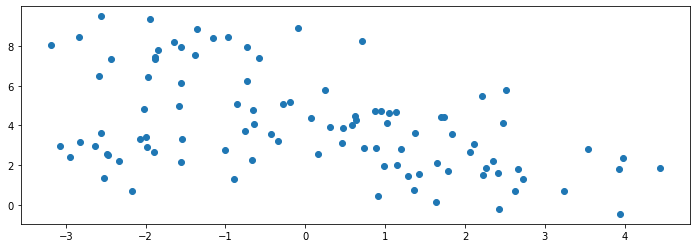

In [49]:
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

# generate 150 random points
np.random.seed(0)
X_all, y_all = datasets.make_blobs(150, centers=4)

# use the first 100 points as the main dataset
X, y = X_all[:100], y_all[:100]
plt.scatter(X[:,0], X[:,1])

We know the true labels of these clusers, and we can visualize them.

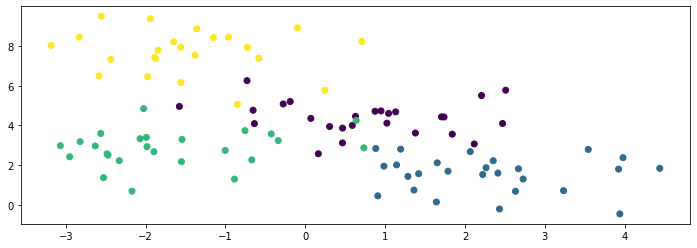

In [50]:
plt.scatter(X[:,0], X[:,1], c=y)

We will also keep 50 points as a holdout set.

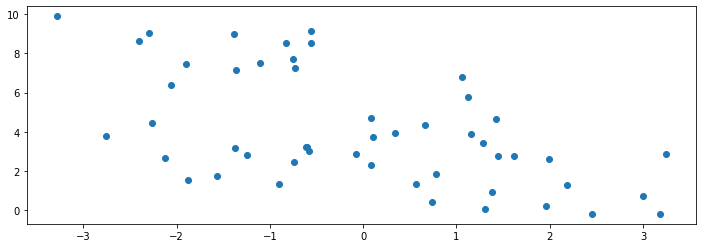

In [51]:
# use the last 50 points as a holdout set
X_holdout, y_holdout = X_all[100:], y_all[100:]
plt.scatter(X_holdout[:,0], X_holdout[:,1])

# Underfitting in Unsupervised Learning

Underfitting happens when we are not able to fully learn the signal hidden in the data.

In the context of GMMs, this means not capturing all the clusters in the data.

Let's fit a GMM on our toy dataset.

In [52]:
# fit a GMM
from sklearn import mixture
model = mixture.GaussianMixture(n_components=2)
model.fit(X)

GaussianMixture(n_components=2)

The model finds two distinct components in the data, but they fail to capture the true structure.

We can also measure the value of our objective (the log-likelihood) on the training and holdout sets.

Training Set Log-Likelihood (higher is better): -4.09
Holdout Set Log-Likelihood (higher is better): -4.22


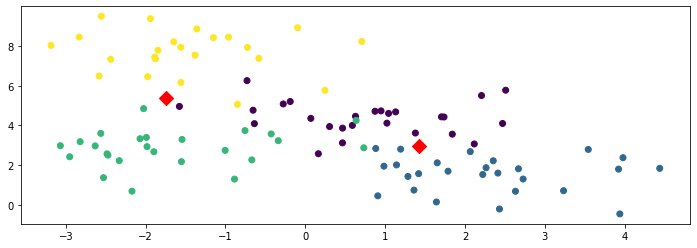

In [53]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(model.means_[:,0], model.means_[:,1], marker='D', c='r', s=100)
print('Training Set Log-Likelihood (higher is better): %.2f' % model.score(X))
print('Holdout Set Log-Likelihood (higher is better): %.2f' % model.score(X_holdout))

Consider now what happens if we further increase the number of clusters.

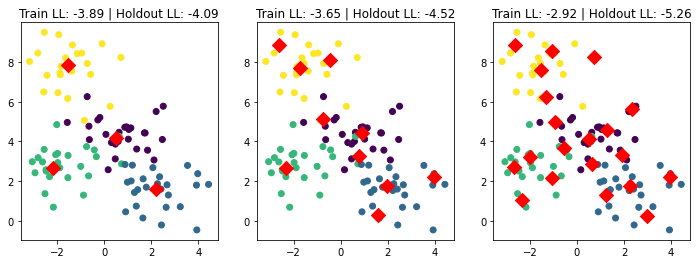

In [54]:
Ks = [4, 10, 20]
f, axes = plt.subplots(1,3)
for k, ax in zip(Ks, axes):
    model = mixture.GaussianMixture(n_components=k)
    model.fit(X)
    ax.scatter(X[:,0], X[:,1], c=y)
    ax.scatter(model.means_[:,0], model.means_[:,1], marker='D', c='r', s=100)
    ax.set_title('Train LL: %.2f | Holdout LL: %.2f' % (model.score(X), model.score(X_holdout)))

# Overfitting in Unsupervised Learning

Overfitting happens when we fit the noise, but not the signal.

In our example, this means fitting small, local noise clusters rather than the true global clusters.

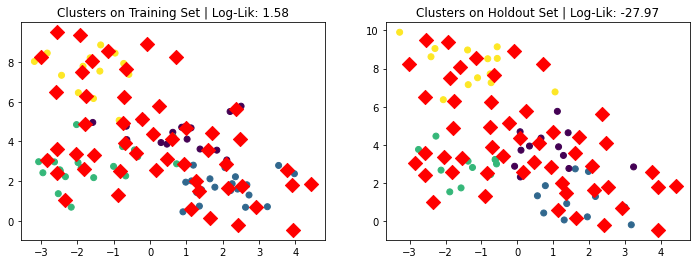

In [55]:
model = mixture.GaussianMixture(n_components=50)
model.fit(X)

plt.subplot(121)
plt.title('Clusters on Training Set | Log-Lik: %.2f' % model.score(X))
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(model.means_[:,0], model.means_[:,1], marker='D', c='r', s=100)

plt.subplot(122)
plt.title('Clusters on Holdout Set | Log-Lik: %.2f' % model.score(X_holdout))
plt.scatter(X_holdout[:,0], X_holdout[:,1], c=y_holdout)
plt.scatter(model.means_[:,0], model.means_[:,1], marker='D', c='r', s=100)

# Measuring Generalization Using Log-Likelihood

Probabilistic unsupervised models optimize an objective that can be used to detect overfitting and underfitting by comparing performance between training and holdout sets.

Below, we visualize the performance (measured via negative log-likelihood) on training and holdout sets as $K$ increases.

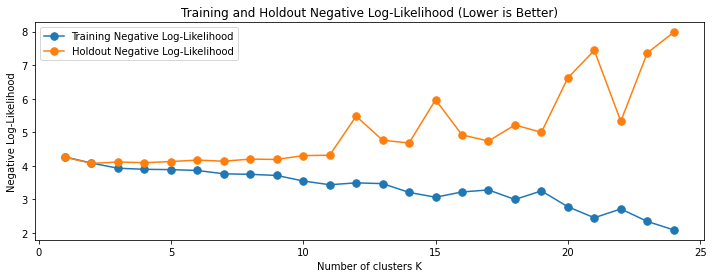

In [56]:
Ks, training_objs, holdout_objs = range(1,25), [], []
for k in Ks:
    model = mixture.GaussianMixture(n_components=k)
    model.fit(X)
    training_objs.append(-model.score(X))
    holdout_objs.append(-model.score(X_holdout))

plt.plot(Ks, training_objs, '.-', markersize=15)
plt.plot(Ks, holdout_objs, '.-', markersize=15)
plt.xlabel("Number of clusters K")
plt.ylabel("Negative Log-Likelihood")
plt.title("Training and Holdout Negative Log-Likelihood (Lower is Better)")
plt.legend(['Training Negative Log-Likelihood', 'Holdout Negative Log-Likelihood'])

__Warning__: This process doesn't work as well as in supervised learning

For example, detecting overfitting with larger datasets will be paradoxically harder (try it!)

# Summary

* Generalization is important for supervised and unsupervised learning.
* A probabilistic model can detect overfitting by comparing the likelihood of training data vs. that of holdout data.
* We can reduce overfitting by making the model less expressive.